# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data_path = '/content/sample_data/CIB_synthetic_data (1).csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

Transaction_ID        Date  Client_ID  Account_Number Transaction_Type  \
0               1  2023-01-01       4174         1415008         Transfer   
1               2  2023-01-02       4507         2631993         Transfer   
2               3  2023-01-03       1860         4351278          Payment   
3               4  2023-01-04       2294         3342035          Payment   
4               5  2023-01-05       2130         8978450       Withdrawal   

      Amount Currency  Exchange_Rate  Amount_in_USD Client_Sector  ...  \
0  566215.77      GBP         0.5800      328405.15     Corporate  ...   
1  929215.57      GBP         0.8595      798660.78           SME  ...   
2  387935.20      GBP         1.3584      526971.18     Corporate  ...   
3   67099.02      EUR         0.7326       49156.74           SME  ...   
4   20136.33      EUR         0.6155       12393.91     Corporate  ...   

  Employee_Role Risk_Score Fraud_Flag Approval_Status  Settlement_Date  \
0     Associate      0.887          1         Pending       2023-01-02   
1      Director      0.576          0        Rejected       2023-01-03   
2       Manager      0.640          0        Approved       2023-01-04   
3      Director      0.408          0         Pending       2023-01-05   
4     Associate      0.675          0        Rejected       2023-01-06   

  Maturity_Date  Interest_Rate Collateral_Type   Loan_Type             Purpose  
0    2024-01-01          0.037           Bonds  Short-term    Debt Refinancing  
1    2024-01-02          0.062        Property   Revolving  Business Expansion  
2    2024-01-03          0.095             NaN   Long-term     Working Capital  
3    2024-01-04          0.090             NaN   Long-term  Business Expansion  
4    2024-01-05          0.079        Property  Short-term  Equipment Purchase  

[5 rows x 27 columns]

### Summary Statistics

In [2]:
df.describe()

Transaction_ID    Client_ID  Account_Number         Amount  \
count     1895.000000  1895.000000    1.895000e+03    1895.000000   
mean       948.000000  3019.664380    5.508427e+06  495076.099599   
std        547.183699  1140.252871    2.559043e+06  287197.266771   
min          1.000000  1001.000000    1.017297e+06    1030.690000   
25%        474.500000  2033.000000    3.365304e+06  251175.570000   
50%        948.000000  3027.000000    5.443778e+06  484688.860000   
75%       1421.500000  4017.500000    7.725863e+06  739227.860000   
max       1895.000000  4994.000000    9.998604e+06  998794.140000   

       Exchange_Rate  Amount_in_USD  Branch_Code  Employee_ID   Risk_Score  \
count    1895.000000   1.895000e+03  1895.000000  1895.000000  1895.000000   
mean        1.006625   4.965632e+05   559.812137   545.928232     0.494953   
std         0.288586   3.302668e+05   256.546050   257.898198     0.290530   
min         0.501600   6.798400e+02   100.000000   100.000000     0.000000   
25%         0.764850   2.298408e+05   337.000000   325.000000     0.244500   
50%         1.011600   4.515139e+05   571.000000   551.000000     0.489000   
75%         1.259650   7.126632e+05   779.500000   759.500000     0.744000   
max         1.499800   1.467382e+06   998.000000   999.000000     1.000000   

        Fraud_Flag  Interest_Rate  
count  1895.000000    1895.000000  
mean      0.499736       0.055118  
std       0.500132       0.025869  
min       0.000000       0.010000  
25%       0.000000       0.033000  
50%       0.000000       0.054000  
75%       1.000000       0.077000  
max       1.000000       0.100000

### Check for Missing Values

In [3]:
df.isnull().sum()

Transaction_ID          0
Date                    0
Client_ID               0
Account_Number          0
Transaction_Type        0
Amount                  0
Currency                0
Exchange_Rate           0
Amount_in_USD           0
Client_Sector           0
Client_Industry         0
Region                  0
Country                 0
City                    0
Branch_Code             0
Transaction_Status      0
Employee_ID             0
Employee_Role           0
Risk_Score              0
Fraud_Flag              0
Approval_Status         0
Settlement_Date         0
Maturity_Date           0
Interest_Rate           0
Collateral_Type       451
Loan_Type               0
Purpose                 0
dtype: int64

### Data Types

In [4]:
df.dtypes

Transaction_ID          int64
Date                   object
Client_ID               int64
Account_Number          int64
Transaction_Type       object
Amount                float64
Currency               object
Exchange_Rate         float64
Amount_in_USD         float64
Client_Sector          object
Client_Industry        object
Region                 object
Country                object
City                   object
Branch_Code             int64
Transaction_Status     object
Employee_ID             int64
Employee_Role          object
Risk_Score            float64
Fraud_Flag              int64
Approval_Status        object
Settlement_Date        object
Maturity_Date          object
Interest_Rate         float64
Collateral_Type        object
Loan_Type              object
Purpose                object
dtype: object

### Correlation Matrix

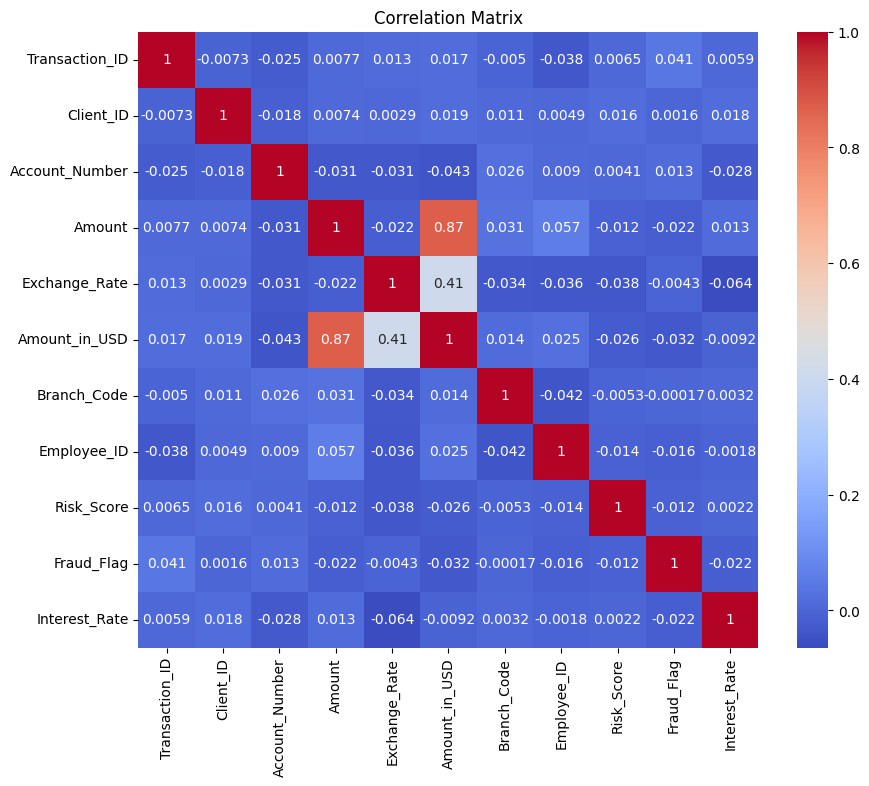

In [9]:

# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


# Identify numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Data Visualization

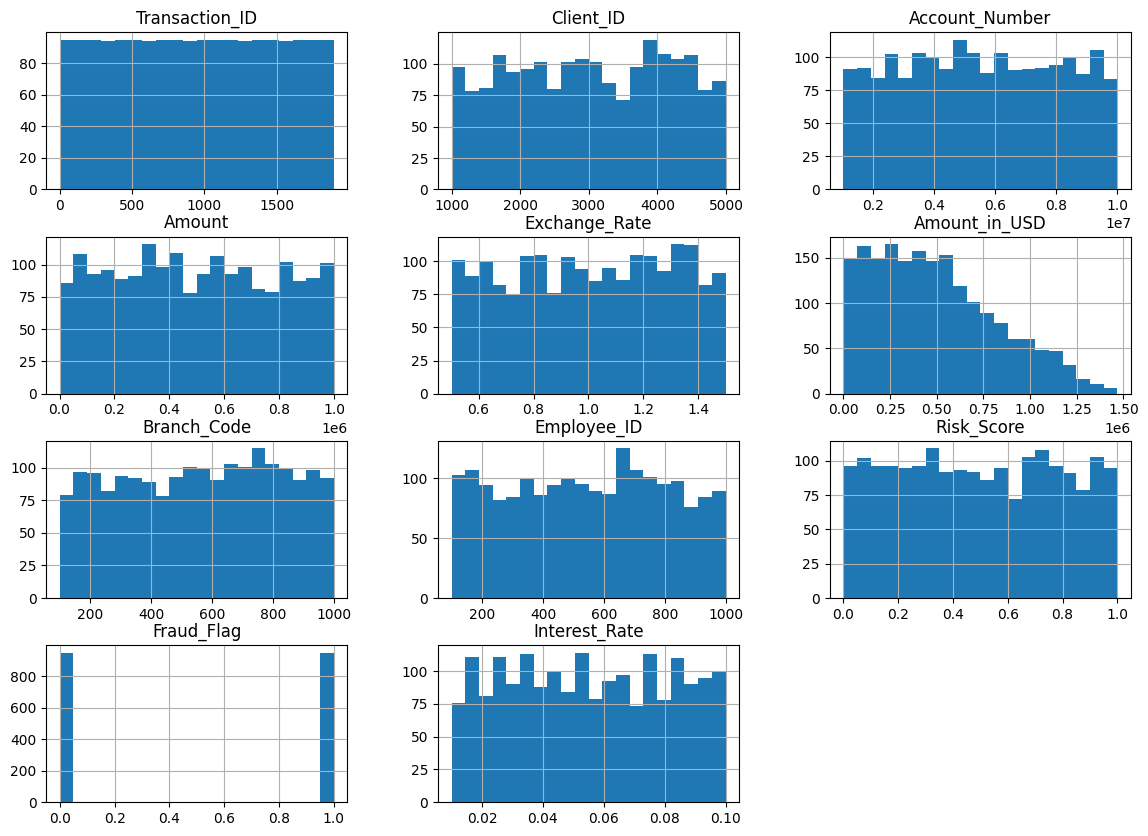

In [10]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

# Histogram for each feature
df.hist(bins=20, figsize=(14, 10))
plt.show()

### Linear Regression

In [11]:
# Assuming 'target' is the column to predict and all other columns are features
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

KeyError: "['target'] not found in axis"

In [16]:

# Display the first few rows of the dataframe
print(df.head())

# Display column names to identify the target column
print(df.columns)

# Update 'target' with the correct column name after identifying
target_column = 'Exchange_Rate'  # Replace 'target' with the actual target column name

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Drop non-numeric columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Separate features and target variable
X = df_numeric.drop(target_column, axis=1)
y = df_numeric[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

   Transaction_ID        Date  Client_ID  Account_Number Transaction_Type  \
0               1  2023-01-01       4174         1415008         Transfer   
1               2  2023-01-02       4507         2631993         Transfer   
2               3  2023-01-03       1860         4351278          Payment   
3               4  2023-01-04       2294         3342035          Payment   
4               5  2023-01-05       2130         8978450       Withdrawal   

      Amount Currency  Exchange_Rate  Amount_in_USD Client_Sector  ...  \
0  566215.77      GBP         0.5800      328405.15     Corporate  ...   
1  929215.57      GBP         0.8595      798660.78           SME  ...   
2  387935.20      GBP         1.3584      526971.18     Corporate  ...   
3   67099.02      EUR         0.7326       49156.74           SME  ...   
4   20136.33      EUR         0.6155       12393.91     Corporate  ...   

  Employee_Role Risk_Score Fraud_Flag Approval_Status  Settlement_Date  \
0     Associate   

<ipython-input-16-84cea3d7e9b0>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')


### Model Validation

In [17]:
# Calculate and print the Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.020726846612370384
R^2 Score: 0.7568442562396432


The Mean Squared Error (MSE) and R-squared (R²) score are key metrics used to evaluate the performance of a linear regression model.

### Mean Squared Error (MSE)

The MSE is the average of the squared differences between the actual and predicted values. It quantifies the error in the model's predictions. A lower MSE indicates that the model's predictions are closer to the actual values.

For your model:

- **MSE: 0.020726846612370384**: This value suggests that, on average, the squared difference between the actual and predicted values is 0.0207. Depending on the scale of the target variable, this might indicate good or poor performance. Generally, the MSE should be compared to the variance of the target variable to interpret its significance properly.

### R-squared (R²) Score

The R² score, also known as the coefficient of determination, indicates how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, with 1 indicating perfect prediction and 0 indicating no predictive power.

For your model:

- **R² Score: 0.7568442562396432**: This value means that approximately 75.68% of the variability in the target variable can be explained by the independent variables in your model. An R² score closer to 1 indicates a better fit, while a score closer to 0 indicates a poor fit.

### Inference

- **Model Performance**: Your model explains a substantial portion of the variance in the target variable (approximately 75.68%), indicating a good fit.
- **Prediction Accuracy**: The MSE value indicates that the average squared error between the predicted and actual values is relatively low, suggesting that the model's predictions are reasonably accurate.

### Summary

- The model has a reasonably high R² score, suggesting that the independent variables explain a significant portion of the target variable's variance.
- The MSE is relatively low, indicating that the model's predictions are close to the actual values.

In conclusion, your linear regression model demonstrates good predictive power and accuracy, making it a useful tool for predicting the target variable based on the given features. However, always consider the context and the domain-specific acceptable error margins to make more informed decisions.

### Prediction on New Data

In [21]:
df_numeric.head()

Transaction_ID  Client_ID  Account_Number     Amount  Exchange_Rate  \
0               1       4174         1415008  566215.77         0.5800   
1               2       4507         2631993  929215.57         0.8595   
2               3       1860         4351278  387935.20         1.3584   
3               4       2294         3342035   67099.02         0.7326   
4               5       2130         8978450   20136.33         0.6155   

   Amount_in_USD  Branch_Code  Employee_ID  Risk_Score  Fraud_Flag  \
0      328405.15          618          474       0.887           1   
1      798660.78          492          332       0.576           0   
2      526971.18          871          862       0.640           0   
3       49156.74          700          998       0.408           0   
4       12393.91          276          737       0.675           0   

   Interest_Rate  
0          0.037  
1          0.062  
2          0.095  
3          0.090  
4          0.079

In [22]:
# Assuming new_data is a DataFrame with the same features as X
new_data = pd.DataFrame({
    'Transaction_ID': [100001, 100002, 100003],
    'Client_ID': [1001, 1002, 1003],
    'Account_Number': [123456789, 987654321, 111111111],
    'Amount': [1000.0, 2000.0, 3000.0],
    'Amount_in_USD': [0, 0, 0],
    'Branch_Code': [618, 492, 700],
    'Employee_ID': [1, 2, 3],
    'Risk_Score': [0.1, 0.2, 0.3],
    'Fraud_Flag': [0, 0, 0],
    'Interest_Rate': [0.01, 0.02, 0.03],
})
# Make predictions on the new data
new_predictions = model.predict(new_data)
print(new_predictions)

[ 0.63481123 -0.45280588  0.63792952]
